# Recommenders

## Colaborative filtering

***

Y - rating matrix with input from users

R - matrix with info whether the user has rated the product (0 if no, 1 if yes)


$$ 
\mathbf{R}=
\begin{bmatrix} 
1 & 0 & ... & 1 \\
1 & 1 & ... & 1 \\
1 & 0 & ... & 0 \\
0 & 1 & ... & 1 \\
\end{bmatrix} 
\mathbf{Y}=
\begin{bmatrix} 
5 & 0 & ... & 1 \\
3 & 4 & ... & 2 \\
2 & 0 & ... & 0 \\
0 & 5 & ... & 13 \\
\end{bmatrix}
\\
\\
Y(i,j)=R(i,j)(w_j \cdot x_i + b_j)
$$

***

`Left matrix` has the `ratng` of `users` (columns) for each `item` (row)

`Right matrix` has a `feature scores for items` (x_1 how romantic item is) and (x_2 how much action it has)

$$
\begin{bmatrix} 
5 & 5 & 0 & 0 \\
5 & ? & ? & 0 \\
? & 4 & 0 & ? \\
0 & 0 & 5 & 4 \\
\end{bmatrix}
\begin{bmatrix} 
0.9 & 0 \\
1.0 & 0.01 \\
0.99 & 1.0 \\
0 & 0.9 \\
\end{bmatrix}
$$

$$
w^{(1)}=\begin{bmatrix} 
5  \\
0 \\
\end{bmatrix}
\\
x^{(1)}=\begin{bmatrix} 
0.99  \\
0 \\
\end{bmatrix}
$$

$$ b_1=0 $$

$w^{(1)}$ stands for preferences for first user (likes romantic and doesn't like action)

$x^{(1)}$ stands for features for first item (very romantic and with no action)

user i rating score for j item: $$w^{(j)} \cdot x^{(i)} + b^{(j)} = RATING$$

$$w^{(1)} \cdot x^{(3)} + b^{(1)} = 4.95$$

$w^{(j)},b^{(j)},x^{(i)}$ are generated basing on the `left matrix` by minimizing the cost function with respect to $w$, $x$ and $b$

$$ min J (w_j,x^{(i)},b_j)= \frac{1}{2m_j} \sum_{i:r(i,j)=1}^{} (w_j*x^{(i)}+b_j-y^{(i)})^{2} + {\color{blue}{\frac{\lambda}{2m_j} \sum_{k=0}^{n}(w^{k}_j)^{2}}} + {\color{blue}{\frac{\lambda}{2m_j} \sum_{k=0}^{n}(x^{k}_i)^{2}}} $$

As we have ratings of some users on some products, based on them we can adjust the w, and b and having them we can guess x for customers on new products

#### Gradient descent

$$
w^{(j)}_i = w^{(j)}_i - \alpha \dfrac{\partial}{\partial w^{(j)}_i} J(w,x,b)
\\
b^{(j)}_i = b^{(j)}_i - \alpha \dfrac{\partial}{\partial b^{(j)}_i} J(w,x,b)
\\
x^{(i)}_k = x^{(i)}_k - \alpha \dfrac{\partial}{\partial x^{(i)}_k} J(w,x,b)
$$

#### mean normalization

calculate `mean rate` for each `product` and assign it as default value for `new users`

$$
\mu=
\begin{bmatrix} 
2.5 \\
2.5 \\
2 \\
2.25 \\
\end{bmatrix}
$$

Exact steps are to `subtract the mean from the raitng matrix` and add it back in the `algorythm` so that new users have some rating and not 0

a new rating martix would look like this:

$$
\begin{bmatrix} 
2.5 & 2.5 & -2.5 & -2.5 & ? \\
2.5 & ? & ? & -2.5 & ?\\
? & 2 & -2 & ? & ?\\
-1.25 & -1.25 & 2.75 & 1.47 & ?\\
\end{bmatrix}
$$

 $$w^{(j)} \cdot x^{(i)} + b^{(j)} +\mu_i = RATING$$

***

#### gradient in tf

In [112]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
w=tf.Variable(3.0)
x=1.0
y=1.0
alpha=0.01
iterations=30
for i in range(iterations):
    with tf.GradientTape() as tape:
        fwb=x*w
        cost=(fwb-y)**2
    [dJdw]=tape.gradient(cost,[w])
    w.assign_add(-alpha*dJdw)

In [26]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0909684>

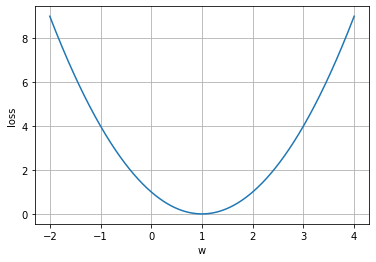

In [27]:
w_=np.linspace(-2,4,1000)
loss=(x*w_-y)**2
plt.plot(w_,loss)
plt.xlabel('w')
plt.ylabel('loss')
plt.grid()

***

In [86]:
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras

In [87]:
def normalizeRatings(Y, R):
    """
    Preprocess data by subtracting mean rating for every movie (every row).
    Only include real ratings R(i,j)=1.
    [Ynorm, Ymean] = normalizeRatings(Y, R) normalized Y so that each movie
    has a rating of 0 on average. Unrated moves then have a mean rating (0)
    Returns the mean rating in Ymean.
    """
    Ymean = (np.sum(Y*R,axis=1)/(np.sum(R, axis=1)+1e-12)).reshape(-1,1)
    Ynorm = Y - np.multiply(Ymean, R)
    return(Ynorm, Ymean)

def load_precalc_params():

    file = open('./data/ml-latest-small/small_movies_X.csv', 'rb')
    X = loadtxt(file, delimiter = ",")

    file = open('./data/ml-latest-small/small_movies_W.csv', 'rb')
    W = loadtxt(file,delimiter = ",")

    file = open('./data/ml-latest-small/small_movies_b.csv', 'rb')
    b = loadtxt(file,delimiter = ",")
    b = b.reshape(1,-1)
    num_movies, num_features = X.shape
    num_users,_ = W.shape
    return(X, W, b, num_movies, num_features, num_users)
   
def load_ratings():
    file = open('./data/ml-latest-small/small_movies_Y.csv', 'rb')
    Y = loadtxt(file,delimiter = ",")

    file = open('./data/ml-latest-small/small_movies_R.csv', 'rb')
    R = loadtxt(file,delimiter = ",")
    return(Y,R)

def load_Movie_List_pd():
    """ returns df with and index of movies in the order they are in in the Y matrix """
    df = pd.read_csv('./data/ml-latest-small/small_movie_list.csv', header=0, index_col=0,  delimiter=',', quotechar='"')
    mlist = df["title"].to_list()
    return(mlist, df)

In [88]:
x,w,b,num_movies,num_features,num_users=load_precalc_params()
y,r=load_ratings()
print(f'x: {x.shape}')
print(f'w: {w.shape}')
print(f'b: {b.shape}')
print(f'y: {y.shape}')
print(f'r: {r.shape}')
print(f'num_features: {num_features}')
print(f'num_users: {num_users}')
print(f'num_movies: {num_movies}')

x: (4778, 10)
w: (443, 10)
b: (1, 443)
y: (4778, 443)
r: (4778, 443)
num_features: 10
num_users: 443
num_movies: 4778


In [89]:
mu=np.mean(y[0,r[0,:].astype(bool)])
mu

3.4

In [90]:
w[0]

array([ 0.47935075,  0.4766997 ,  0.48794055, -0.11980432, -0.32864022,
        0.4232462 , -0.3951074 , -0.2383076 , -0.36121953, -0.18090296])

In [91]:
x[0]

array([-0.03328682,  1.1667464 , -0.5064895 ,  0.1250965 ,  1.5347596 ,
       -0.21013564,  0.10417578, -0.349303  ,  0.75385165, -0.20810875])

In [92]:
b[0,0]

0.23609531

In [93]:
y[0,0]

0.0

In [94]:
(np.dot(x[0],w[0])+b[0,0]-y[0,0])**2

0.0738194323347234

multipy by r so that we cont add cost for case where y=0 (no rating)

In [95]:
r[0,0]*(np.dot(x[0],w[0])+b[0,0]-y[0,0])**2

0.0

In [96]:
def cost(x,w,b,y,r,lambda_):
    """
    Calculates cost for the content-based filtering
    
    Parameters:
    -----------
    x: array (num_movies,features)
        matrix of item features
    w array (num_users, num_features)
        matrix of user parameters
    b: array
        vector of user parameters
    y: array
        matrix of user ratings
    r: array
        matrix with info whether film was rated by user
    
    Returns:
    --------
    J: float
        cost
    """
    
    nm,nu=y.shape
    J=0
    
    for i in range(nu):
        w_=w[i]
        b_=b[0,i]
        for j in range(nm):
            x_=x[j]
            y_=y[j,i]
            r_=r[j,i]
            J+=(r_*(np.dot(w_,x_)+b_-y_))**2
            J+=(lambda_/2)*(np.sum(w**2)+np.sum(x**2))
    J=J/2
    
    return J

In [97]:
def cost_v(x,w,b,y,r,lambda_):
    """
    Calculates cost for the content-based filtering
    
    Parameters:
    -----------
    x: array (num_movies,features)
        matrix of item features
    w array (num_users, num_features)
        matrix of user parameters
    b: array
        vector of user parameters
    y: array
        matrix of user ratings
    r: array
        matrix with info whether film was rated by user
    
    Returns:
    --------
    J: float
        cost
    """
    
    j=(tf.linalg.matmul(x,tf.transpose(w))+b-y)*R
    J=0.5*tf.reduce_sum(j**2)+(lambda_/2)*(tf.reduce_sum(x**2)+tf.reduce_sum(w**2))
    
    return J

In [98]:
nu=4
nm=5
nf=3
x_=x[:nm,:nf]
w_=w[:nu,:nf]
b_=b[0:nu].reshape(1,-1)
y_=y[:nm,:nu]
r_=r[:nm,:nu]
J=cost(x_,w_,b_,y_,r_,0)
print(f'cost: {J}')

cost: 13.670725805579915


In [99]:
J=cost(x_,w_,b_,y_,r_,1.5)
print(f'cost: {J}')

cost: 157.90184766437093


***

In [ ]:
x,w,b,num_movies,num_features,num_users=load_precalc_params()
y,r=load_ratings()

In [113]:
movie_list,movie_list_df=load_Movie_List_pd()

In [115]:
my_ratings=np.zeros(num_movies)

my_ratings[929]=5
my_ratings[246]=5
my_ratings[2716]=3
my_ratings[1150]=5
my_ratings[382]=2
my_ratings[432]=1
my_ratings[466]=3
my_ratings[793]=1
my_rated=[i for i in range(len(my_ratings)) if my_ratings[i]>0]
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print(f'rated: {my_ratings[i]} for {movie_list_df.loc[i,"title"]}')

rated: 5.0 for Shrek (2001)
rated: 2.0 for Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
rated: 1.0 for Last Orders (2001)
rated: 3.0 for Lucky Break (2001)
rated: 1.0 for Pirates of the Caribbean: The Curse of the Black Pearl (2003)
rated: 5.0 for Lord of the Rings: The Return of the King, The (2003)
rated: 5.0 for Incredibles, The (2004)
rated: 3.0 for Inception (2010)


In [101]:
Y,R=load_ratings()
Y=np.c_[my_ratings,Y]
R=np.c_[(my_ratings!=0).astype(int),R]

Ynorm,Ymean=normalizeRatings(Y,R)

In [102]:
nm,nu=Y.shape
nf=100

tf.random.set_seed(1234)
W=tf.Variable(tf.random.normal((nu,nf),dtype=tf.float64),name='w')
X=tf.Variable(tf.random.normal((nm,nf),dtype=tf.float64),name='x')
b=tf.Variable(tf.random.normal((1,nu),dtype=tf.float64),name='b')

optimizer=keras.optimizers.Adam(learning_rate=1e-1)

In [103]:
iterations=200
lambda_=1

for i in range(iterations):
    with tf.GradientTape() as tape:
        cost_value=cost_v(X,W,b,Ynorm,R,lambda_)
    grads=tape.gradient(cost_value,[X,W,b])
    optimizer.apply_gradients(zip(grads,[X,W,b]))
    
    if i%20==0:
        print(f'iter: {i}, Loss: {cost_value:.3f}')

iter: 0, Loss: 2320945.212
iter: 20, Loss: 136153.601
iter: 40, Loss: 51851.330
iter: 60, Loss: 24593.162
iter: 80, Loss: 13627.901
iter: 100, Loss: 8486.129
iter: 120, Loss: 5806.522
iter: 140, Loss: 4310.591
iter: 160, Loss: 3434.304
iter: 180, Loss: 2901.147


In [118]:
p=np.matmul(X.numpy(),np.transpose(W.numpy()))+b.numpy()
pm=p+Ymean

my_predictions=pm[:,0]
ix=tf.argsort(my_predictions,direction='DESCENDING')

for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print(f'Orig rating: {my_ratings[i]}, predicted: {my_predictions[i]} for movie {movie_list[i]}')
        
for i in range(10):
    j=ix[i]
    if j not in my_rated:
        print(f'Predicting rating: {my_predictions[i]} for movie {movie_list[j]}')

Orig rating: 5.0, predicted: 4.844267689123638 for movie Shrek (2001)
Orig rating: 2.0, predicted: 2.1776415980500943 for movie Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Orig rating: 1.0, predicted: 1.1544582859904946 for movie Last Orders (2001)
Orig rating: 3.0, predicted: 2.9573982209074097 for movie Lucky Break (2001)
Orig rating: 1.0, predicted: 1.2311395762653299 for movie Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Orig rating: 5.0, predicted: 4.909370783103678 for movie Lord of the Rings: The Return of the King, The (2003)
Orig rating: 5.0, predicted: 4.732906717785769 for movie Incredibles, The (2004)
Orig rating: 3.0, predicted: 2.9931342220221175 for movie Inception (2010)
Predicting rating: 1.591625667666703 for movie Delirium (2014)
Predicting rating: 2.2314083041655377 for movie Laggies (2014)
Predicting rating: 3.368068887583902 for movie One I Love, The (2014)
Predicting rating: 0.4128558622217039 for movie Martin Lawrence Live: Runteldat (2

***

## Content-based filtering

For `collaborative filtering` you generate `two vectors` (user and item) whose dot product gives a rating. Vectors were derrived `from ratings`.

For `content-based filtering` also generates `two vectors` (user and item) but to make them uses other information available about them. Additional info is fed to `neural network that generates the vectors`.

User vector and iten vector have to be of the same size (amount of features).

In [25]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
import csv
from collections import defaultdict
from numpy import genfromtxt
import pickle
pd.set_option('display.precision',1)

In [26]:
top10_df=pd.read_csv('./data/recommenders/content_top10_df.csv')
bygenre_df=pd.read_csv('./data/recommenders/content_bygenre_df.csv')
top10_df

,movie id,num ratings,ave rating,title,genres
0,4993,198,4.1,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
1,5952,188,4.0,"Lord of the Rings: The Two Towers, The",Adventure|Fantasy
2,7153,185,4.1,"Lord of the Rings: The Return of the King, The",Action|Adventure|Drama|Fantasy
3,4306,170,3.9,Shrek,Adventure|Animation|Children|Comedy|Fantasy|Ro...
4,58559,149,4.2,"Dark Knight, The",Action|Crime|Drama
5,6539,149,3.8,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy
6,79132,143,4.1,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller
7,6377,141,4.0,Finding Nemo,Adventure|Animation|Children|Comedy
8,4886,132,3.9,"Monsters, Inc.",Adventure|Animation|Children|Comedy|Fantasy
9,7361,131,4.2,Eternal Sunshine of the Spotless Mind,Drama|Romance|Sci-Fi


In [27]:
bygenre_df

,genre,num movies,ave rating/genre,ratings per genre
0,Action,321,3.4,10377
1,Adventure,234,3.4,8785
2,Animation,76,3.6,2588
3,Children,69,3.4,2472
4,Comedy,326,3.4,8911
5,Crime,139,3.5,4671
6,Documentary,13,3.8,280
7,Drama,342,3.6,10201
8,Fantasy,124,3.4,4468
9,Horror,56,3.2,1345


In [28]:
def load_data():
    ''' called to load preprepared data for the lab '''
    item_train = genfromtxt('./data/recommenders/content_item_train.csv', delimiter=',')
    user_train = genfromtxt('./data/recommenders/content_user_train.csv', delimiter=',')
    y_train    = genfromtxt('./data/recommenders/content_y_train.csv', delimiter=',')
    with open('./data/recommenders/content_item_train_header.txt', newline='') as f:    #csv reader handles quoted strings better
        item_features = list(csv.reader(f))[0]
    with open('./data/recommenders/content_user_train_header.txt', newline='') as f:
        user_features = list(csv.reader(f))[0]
    item_vecs = genfromtxt('./data/recommenders/content_item_vecs.csv', delimiter=',')

    movie_dict = defaultdict(dict)
    count = 0
#    with open('./data/movies.csv', newline='') as csvfile:
    with open('./data/recommenders/content_movie_list.csv', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for line in reader:
            if count == 0:
                count += 1  #skip header
                #print(line) print
            else:
                count += 1
                movie_id = int(line[0])
                movie_dict[movie_id]["title"] = line[1]
                movie_dict[movie_id]["genres"] = line[2]

    with open('./data/recommenders/content_user_to_genre.pickle', 'rb') as f:
        user_to_genre = pickle.load(f)

    return(item_train, user_train, y_train, item_features, user_features, item_vecs, movie_dict, user_to_genre)


In [56]:
item_train,user_train,y_train,item_features,user_features,item_vecs,movie_dict,user_to_genre=load_data()

num_user_features=user_train.shape[1]-3
num_item_features=item_train.shape[1]-1
uvs=3
ivs=3
u_s=3
i_s=1
print(f'Number of train vectors: {len(item_train)}')
print(f'Number of train vectors: {len(user_train)}')

Number of train vectors: 50884
Number of train vectors: 50884


In [57]:
#pprint_train(item_train,item_featurs,ivs,i_s,maxcount=5)
print(f'y_train[:5]: {y_train[:5]}')

y_train[:5]: [4.  3.5 4.  4.  4.5]


#### data preparation

In [58]:
item_train_unscaled=item_train
user_train_unscaled=user_train
y_train_unscaled=y_train

scalerItem=StandardScaler()
scalerItem.fit(item_train)
item_train=scalerItem.transform(item_train)

scalerUser=StandardScaler()
scalerUser.fit(user_train)
user_train=scalerUser.transform(user_train)

scalerTarget=MinMaxScaler((-1,1))
scalerTarget.fit(y_train.reshape(-1,1))
y_train=scalerTarget.transform(y_train.reshape(-1,1))

print(np.allclose(item_train_unscaled,scalerItem.inverse_transform(item_train)))
print(np.allclose(user_train_unscaled,scalerUser.inverse_transform(user_train)))

True
True


In [59]:
item_train,item_test=train_test_split(item_train,train_size=0.8,shuffle=True,random_state=1)
user_train,user_test=train_test_split(user_train,train_size=0.8,shuffle=True,random_state=1)
y_train,y_test=train_test_split(y_train,train_size=0.8,shuffle=True,random_state=1)
print(f'item training data shape: {item_train.shape}')
print(f'item test data shape: {item_test.shape}')
print(f'user training data shape: {user_train.shape}')
#pprint(user_train,user_features,uvs,u_s,maxcount=5)

item training data shape: (40707, 17)
item test data shape: (10177, 17)
user training data shape: (40707, 17)


#### neaural network

In [60]:
num_outputs=32
tf.random.set_seed(1)

user_nn=tf.keras.models.Sequential(
[
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_outputs,activation='linear')
])

item_nn=tf.keras.models.Sequential(
[
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_outputs,activation='linear')
])

input_user=tf.keras.layers.Input(shape=(num_user_features))
vu=user_nn(input_user)
vu=tf.linalg.l2_normalize(vu,axis=1)

input_item=tf.keras.layers.Input(shape=(num_item_features))
vi=item_nn(input_item)
vi=tf.linalg.l2_normalize(vi,axis=1)

output=tf.keras.layers.Dot(axes=1)([vu,vi])
model=tf.keras.Model([input_user,input_item],output)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 14)]         0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 sequential_12 (Sequential)     (None, 32)           40864       ['input_12[0][0]']               
                                                                                                  
 sequential_13 (Sequential)     (None, 32)           41376       ['input_13[0][0]']               
                                                                                            

In [61]:
tf.random.set_seed(1)
cost_fn=tf.keras.losses.MeanSquaredError()
opt=keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss=cost_fn)

In [62]:
tf.random.set_seed(1)
model.fit([user_train[:,u_s:],item_train[:,i_s:]],y_train,epochs=30)

Epoch 1/30
1273/1273 [==============================] - 4s 2ms/step - loss: 0.1244
Epoch 2/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.1161
Epoch 3/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.1116
Epoch 4/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.1069
Epoch 5/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.1039
Epoch 6/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.1008
Epoch 7/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0985
Epoch 8/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0964
Epoch 9/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0942
Epoch 10/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0926
Epoch 11/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0909
Epoch 12/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0893
E

In [63]:
model.evaluate([user_test[:,u_s:],item_test[:,i_s:]],y_test)

319/319 [==============================] - 1s 1ms/step - loss: 0.0827


0.08265088498592377

#### new user

In [64]:
new_user_id = 5000
new_rating_ave = 0.0
new_action = 0.0
new_adventure = 5.0
new_animation = 0.0
new_childrens = 0.0
new_comedy = 0.0
new_crime = 0.0
new_documentary = 0.0
new_drama = 0.0
new_fantasy = 5.0
new_horror = 0.0
new_mystery = 0.0
new_romance = 0.0
new_scifi = 0.0
new_thriller = 0.0
new_rating_count = 3

user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave,
                      new_action, new_adventure, new_animation, new_childrens,
                      new_comedy, new_crime, new_documentary,
                      new_drama, new_fantasy, new_horror, new_mystery,
                      new_romance, new_scifi, new_thriller]])

In [70]:
def gen_user_vecs(user_vec, num_items):
    """ given a user vector return:
        user predict maxtrix to match the size of item_vecs """
    user_vecs = np.tile(user_vec, (num_items, 1))
    return user_vecs

In [67]:
user_vecs=gen_user_vecs(user_vec,len(item_vecs))

suser_vecs=scalerUser.transform(user_vecs)
sitem_vecs=scalerItem.transform(item_vecs)

y_p=model.predict([suser_vecs[:,u_s:],sitem_vecs[:,i_s:]])
y_pu=scalerTarget.inverse_transform(y_p)

sorted_index=np.argsort(-y_pu,axis=0).reshape(-1).tolist()
sorted_ypu=y_pu[sorted_index]
sorted_items=item_vecs[sorted_index]

#print_pred_movies(sorted_ypu,sorted_items,movie_dict,max_count=10)

27/27 [==============================] - 0s 2ms/step


#### existing user

In [72]:
def get_user_vecs(user_id, user_train, item_vecs, user_to_genre):
    """ given a user_id, return:
        user train/predict matrix to match the size of item_vecs
        y vector with ratings for all rated movies and 0 for others of size item_vecs """

    if not user_id in user_to_genre:
        print("error: unknown user id")
        return None
    else:
        user_vec_found = False
        for i in range(len(user_train)):
            if user_train[i, 0] == user_id:
                user_vec = user_train[i]
                user_vec_found = True
                break
        if not user_vec_found:
            print("error in get_user_vecs, did not find uid in user_train")
        num_items = len(item_vecs)
        user_vecs = np.tile(user_vec, (num_items, 1))

        y = np.zeros(num_items)
        for i in range(num_items):  # walk through movies in item_vecs and get the movies, see if user has rated them
            movie_id = item_vecs[i, 0]
            if movie_id in user_to_genre[user_id]['movies']:
                rating = user_to_genre[user_id]['movies'][movie_id]
            else:
                rating = 0
            y[i] = rating
    return(user_vecs, y)

In [74]:
uid=2
user_vecs,y_vecs=get_user_vecs(uid,user_train_unscaled,item_vecs,user_to_genre)

suser_vecs=scalerUser.transform(user_vecs)
sitem_vecs=scalerItem.transform(item_vecs)

y_p=model.predict([suser_vecs[:,u_s:],sitem_vecs[:,i_s:]])
y_pu=scalerTarget.inverse_transform(y_p)

sorted_index=np.argsort(-y_pu,axis=0).reshape(-1).tolist()
sorted_ypu=y_pu[sorted_index]
sorted_items=item_vecs[sorted_index]
sorted_user=user_vecs[sorted_index]
sorted_y=y_vecs[sorted_index]

#print_pred_movies(sorted_ypu,sorted_items,movie_dict,max_count=10)

27/27 [==============================] - 0s 2ms/step


#### finding similar items

In [75]:
def sq_dist(a,b):
    """
    Calculates squared distance between two vectors
    
    Parameters:
    -----------
    a: array
    b: array
    
    Returns:
    --------
    d: float
    """
    d=np.sum((a-b)**2)
    return d

In [77]:
input_item_m=tf.keras.layers.Input(shape=(num_item_features))
vm_m=item_nn(input_item_m)
vm_m=tf.linalg.l2_normalize(vm_m,axis=1)
model_m=tf.keras.Model(input_item_m,vm_m)
model_m.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 16)]              0         
                                                                 
 sequential_13 (Sequential)  (None, 32)                41376     
                                                                 
 tf.math.l2_normalize_13 (TF  (None, 32)               0         
 OpLambda)                                                       
                                                                 
Total params: 41,376
Trainable params: 41,376
Non-trainable params: 0
_________________________________________________________________


In [78]:
scaled_item_vecs=scalerItem.transform(item_vecs)
vms=model_m.predict(scaled_item_vecs[:,i_s:])
print(f'feature vectors: {vms.shape}')

27/27 [==============================] - 0s 2ms/step
feature vectors: (847, 32)


In [79]:
count = 50  # number of movies to display
dim = len(vms)
dist = np.zeros((dim,dim))

for i in range(dim):
    for j in range(dim):
        dist[i,j] = sq_dist(vms[i, :], vms[j, :])
       
m_dist=ma.masked_array(dist, mask=np.identity(dist.shape[0])) 

disp = [["movie1", "genres", "movie2", "genres"]]
for i in range(count):
    min_idx = np.argmin(m_dist[i])
    movie1_id = int(item_vecs[i,0])
    movie2_id = int(item_vecs[min_idx,0])
    disp.append( [movie_dict[movie1_id]['title'], movie_dict[movie1_id]['genres'],
                  movie_dict[movie2_id]['title'], movie_dict[movie1_id]['genres']]
               )
#table = tabulate.tabulate(disp, tablefmt='html', headers="firstrow")
#table


In [80]:
disp

[['movie1', 'genres', 'movie2', 'genres'],
 ['Save the Last Dance (2001)',
  'Drama|Romance',
  'Mona Lisa Smile (2003)',
  'Drama|Romance'],
 ['Wedding Planner, The (2001)',
  'Comedy|Romance',
  'Mr. Deeds (2002)',
  'Comedy|Romance'],
 ['Hannibal (2001)',
  'Horror|Thriller',
  'Final Destination 2 (2003)',
  'Horror|Thriller'],
 ['Saving Silverman (Evil Woman) (2001)',
  'Comedy|Romance',
  'Sweetest Thing, The (2002)',
  'Comedy|Romance'],
 ['Down to Earth (2001)',
  'Comedy|Fantasy|Romance',
  'Bewitched (2005)',
  'Comedy|Fantasy|Romance'],
 ['Mexican, The (2001)',
  'Action|Comedy',
  'Rush Hour 2 (2001)',
  'Action|Comedy'],
 ['15 Minutes (2001)', 'Thriller', 'Panic Room (2002)', 'Thriller'],
 ['Enemy at the Gates (2001)', 'Drama', 'Seabiscuit (2003)', 'Drama'],
 ['Heartbreakers (2001)',
  'Comedy|Crime|Romance',
  'Sex and the City (2008)',
  'Comedy|Crime|Romance'],
 ['Spy Kids (2001)',
  'Action|Adventure|Children|Comedy',
  'Mummy Returns, The (2001)',
  'Action|Adventure|